# **Project Name**    -   book recommendation system



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

Book Recommendation System  

This is a book recommendation system that uses a user-based collaborative filtering method to recommend books to users. The system takes as input a user's past ratings of books, and then uses this information to recommend other books that the user is likely to enjoy.  The system works by first creating a matrix of similarity scores between all users. This matrix is created by comparing the ratings that each user has given to the same books. The higher the similarity score between two users, the more likely it is that they will enjoy the same books.  Once the similarity matrix has been created, the system can then recommend books to a user by finding other users who have similar tastes and then recommending books that those users have rated highly.  The system is implemented in Python using the Surprise library. The Surprise library provides a number of different algorithms for creating and using collaborative filtering recommender systems.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/kaushikk1999/Book-Recommendation-System.git

# **Problem Statement**


**Write Problem Statement Here.**


There are a large number of books available, and it can be difficult for users to find books that they will enjoy. A book recommendation system can help users find books that they are likely to like based on their past ratings of books, the ratings of other users, and the book's metadata

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px 
import numpy as np
import pandas as pd
import re

C:\Users\yokau\AppData\Local\Temp\ipykernel_26200\1480548072.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### Dataset Loading

In [2]:
# Load Dataset

### Dataset First View

In [3]:
# Dataset First Look

# Imported Books.csv
Books = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\book\\Books.csv')

# Imported Users.csv
Users = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\book\\Users.csv')

# Imported Ratings.csv
Ratings = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\book\\Ratings.csv')

# combine Users and Books
combined_df = pd.merge(Ratings, Books, on='ISBN')

# combine combined_df and Ratings
df = combined_df.merge(Ratings, on=['User-ID', 'ISBN'], how='left')

C:\Users\yokau\AppData\Local\Temp\ipykernel_26200\3331666185.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\book\\Books.csv')


In [4]:
df

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,5
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,0
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,5
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,9
...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.LZZZZZZZ.jpg,0
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.LZZZZZZZ.jpg,7
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.LZZZZZZZ.jpg,0
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.LZZZZZZZ.jpg,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(1031136, 11)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating_x        1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
 10  Book-Rating_y        1031136 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 86.5+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating_x          0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
Book-Rating_y          0
dtype: int64

<Axes: >

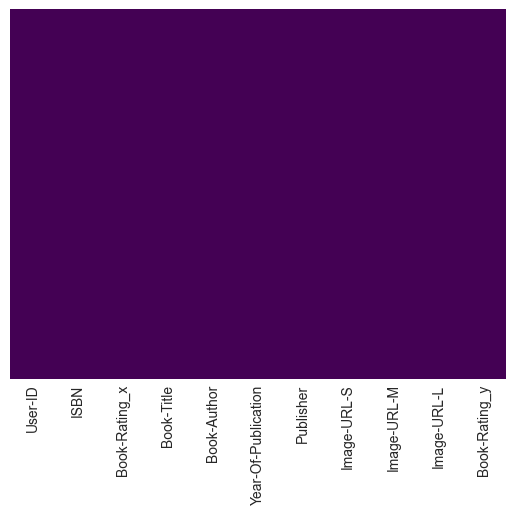

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### What did you know about your dataset?

Answer Here

Book-Author            2

Publisher              2



Image-URL-L            4

very few values are only null

## ***2. Understanding Your Variables***

In [10]:
# Dataset Describe

df.describe(include='all')

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
count,1.031136e+06,1031136,1.031136e+06,1031136,1031134,1031136.0,1031134,1031136,1031136,1031132,1.031136e+06
unique,NaN,270151,NaN,241071,101587,202.0,16729,269842,269842,269839,NaN
top,NaN,0971880107,NaN,Wild Animus,Stephen King,2002.0,Ballantine Books,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg,NaN
freq,NaN,2502,NaN,2502,10053,87276.0,34724,2502,2502,2502,NaN
mean,1.405945e+05,NaN,2.839051e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.839051e+00
...,...,...,...,...,...,...,...,...,...,...,...
min,2.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,7.041500e+04,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,1.412100e+05,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,2.114260e+05,NaN,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+00


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("--------")

# Assuming you have the DataFrame 'df' containing your dataset
display_unique_values(df)

Column: User-ID
Unique Values: [276725   2313   6543 ... 276618 276647 276660]
--------
Column: ISBN
Unique Values: ['034545104X' '0155061224' '0446520802' ... '0590907301' '0679752714'
 '0806917695']
--------
Column: Book-Rating_x
Unique Values: [ 0  5  9  8  6  7  4 10  3  2  1]
--------
Column: Book-Title
Unique Values: ['Flesh Tones: A Novel' 'Rites of Passage' 'The Notebook' ...
 'Triplet Trouble and the Class Trip (Triplet Trouble)'
 'A Desert of Pure Feeling (Vintage Contemporaries)'
 'Perplexing Lateral Thinking Puzzles: Scholastic Edition']
--------
Column: Book-Author
Unique Values: ['M. J. Rose' 'Judith Rae' 'Nicholas Sparks' ... 'Kitta Reeds'
 'Kurt Messick' 'Joseph Delissio']
--------
Column: Year-Of-Publication
Unique Values: [2002 '2001' 1996 '1999' 1998 2001 1994 1995 2003 1997 '1995' 1999 '1998'
 '2024' 1992 '1983' '2002' '1996' '2000' 0 '1989' '2003' '1991' 1993
 '1994' 1976 '1993' 1991 '0' 2000 1983 1990 1982 1988 1981 '1988' 1989
 1986 '1987' '1992' 1987 '1980' '199

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.


In [13]:
# Renamed columns Book-Rating
df.rename(columns={'Book-Rating_x': 'Book-Rating'}, inplace=True)


In [14]:
# Deleted columns Book-Rating_y
df.drop(['Book-Rating_y'], axis=1, inplace=True)


In [15]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [16]:
#delete unnecessary characters from authors, genres and description column
col_trans = ['Publisher', 'Book-Author', 'Book-Title']
for col in col_trans:
    df[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True) 
df['Book-Title'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]" : ""}, regex=True, inplace=True)
#df['Book-Title'] = df['Book-Title'].str.lower()

In [17]:
df.shape

(1031136, 10)

In [18]:
df.shape

(1031136, 10)

### What all manipulations have you done and insights you found?

Answer Here.

Deleted columns Book-Rating_y


and


Renamed columns Book-Rating


and removed unwanted symbols like this [\[\]\-\\\/\"—'()|:] from book title column


and 


Changed Year-Of-Publication to dtype int

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
# Chart - 1 visualization code

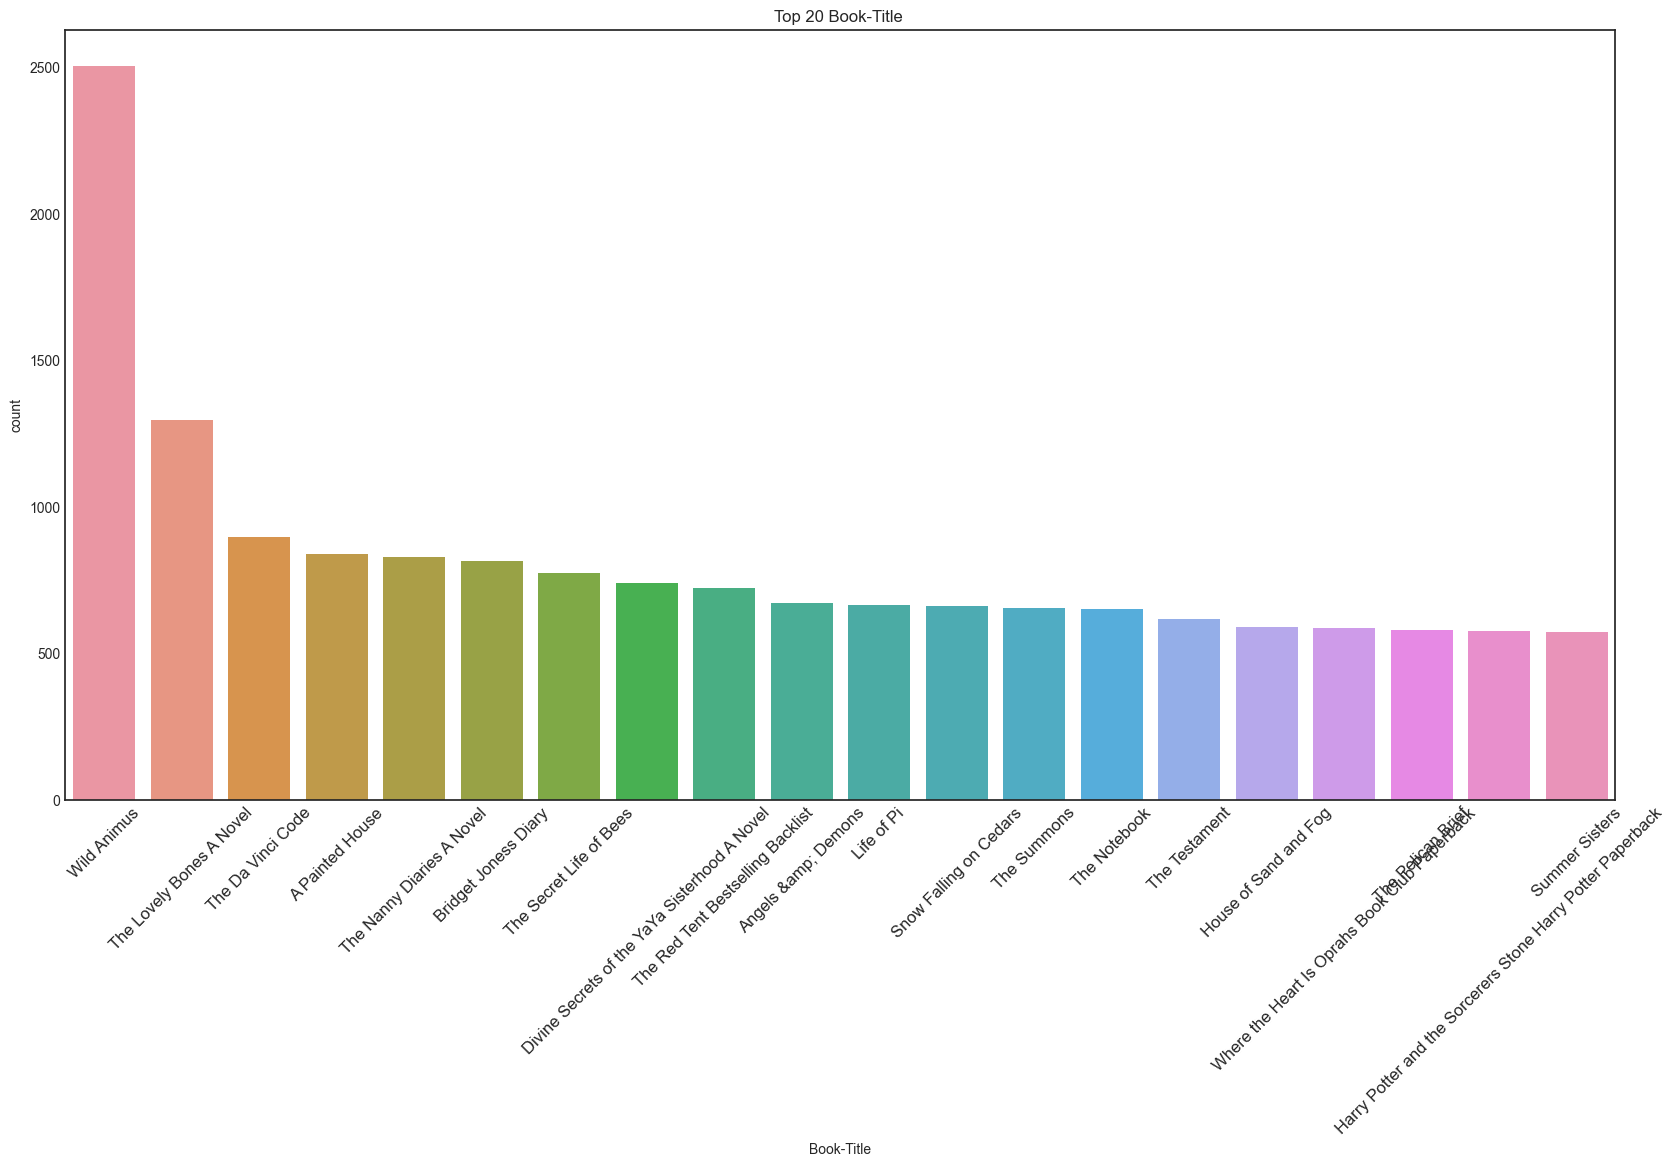

In [20]:

plt.figure(figsize = (20, 10))
sns.countplot(x = 'Book-Title', data = df,
             order = df['Book-Title'].value_counts().iloc[:20].index)
plt.title("Top 20 Book-Title ")
plt.xticks(fontsize = 12)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see top 20 books

##### 2. What is/are the insight(s) found from the chart?

Answer Here

top book is wild animus

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

all the books at top selling points we  should put more attention to them for promotion and more selling of these books

#### Chart - 2

In [21]:
# Chart - 2 visualization code


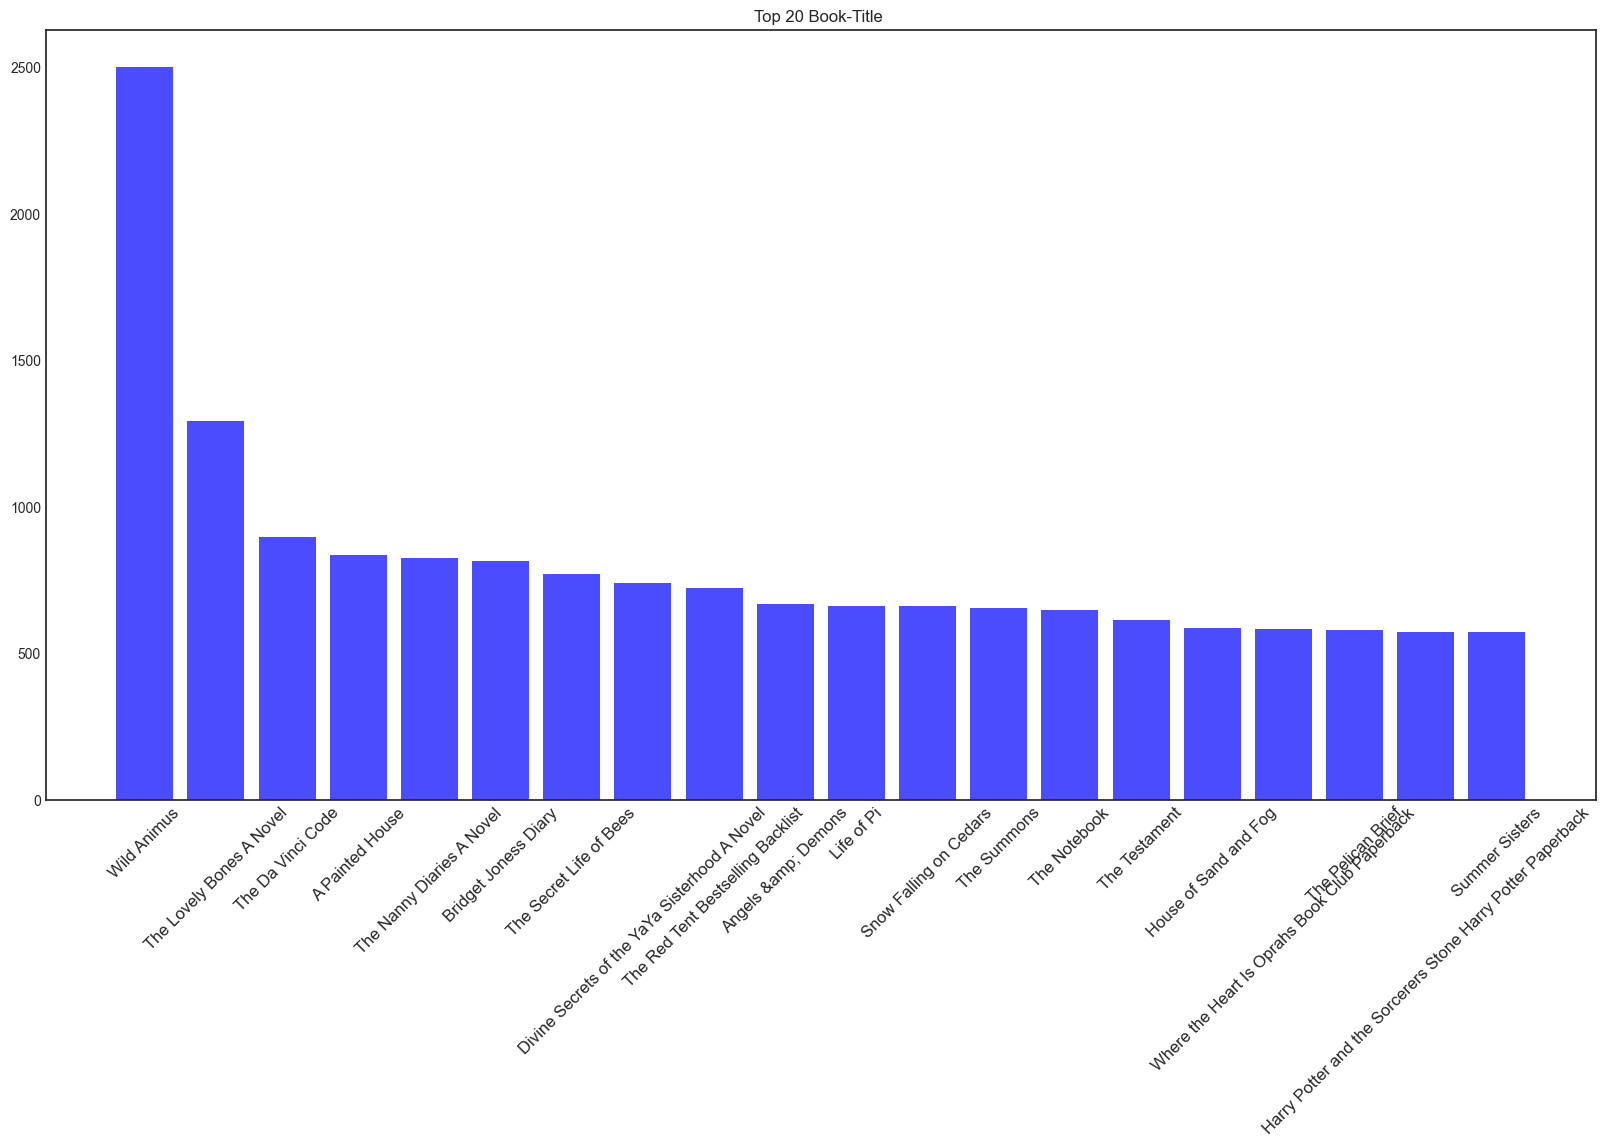

In [22]:
plt.figure(figsize = (20, 10))
plt.bar(df['Book-Title'].value_counts().iloc[:20].index, df['Book-Title'].value_counts().iloc[:20],
        width=0.8, color='blue', alpha=0.7)
plt.title("Top 20 Book-Title ")
plt.xticks(fontsize = 12)
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

to see top rated book 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

the book the wild animus is most rated

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

we should showcase this book more on websites and book similar to it and book with same author so that other books  there sales boost up

#### Chart - 3

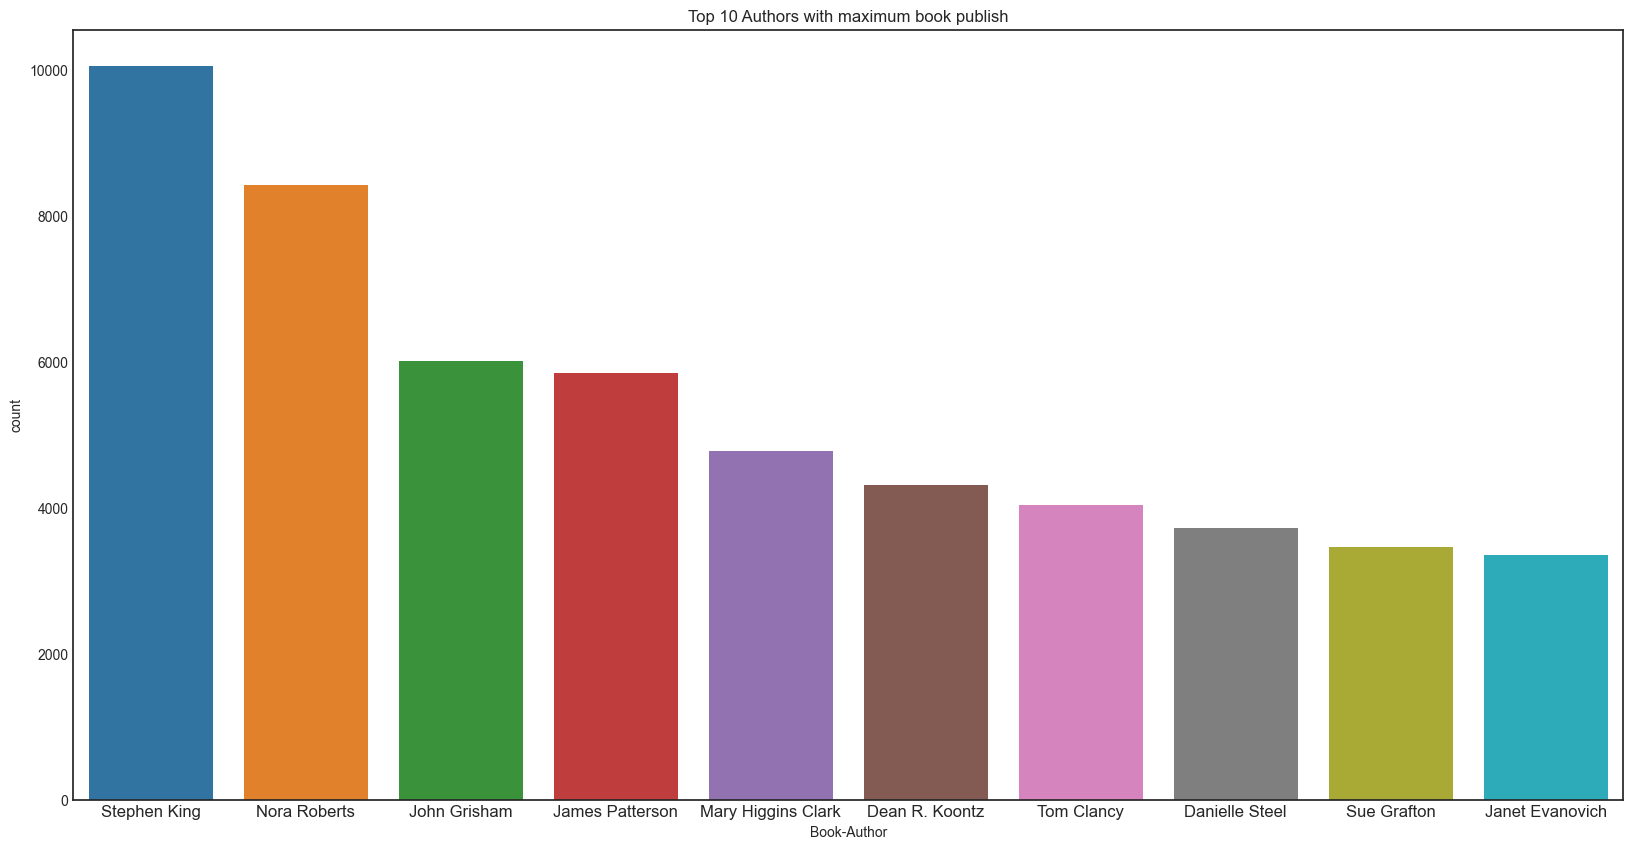

In [23]:
# Chart - 3 visualization code

plt.figure(figsize = (20, 10))
sns.countplot(x = 'Book-Author', data = df,
             order = df['Book-Author'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see top authors

##### 2. What is/are the insight(s) found from the chart?

Answer Here

stephen king is at top 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

we should see what books does he write which is liked by many people to boost him to write similar and phuslish in our website to attract traffic

#### Chart - 4

In [24]:
# Chart - 4 visualization code

In [25]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [26]:
book = df['Book-Title'].value_counts()[:30]
book

Book-Title
Wild Animus                                                    2502
The Lovely Bones A Novel                                       1295
The Da Vinci Code                                               898
A Painted House                                                 838
The Nanny Diaries A Novel                                       828
Bridget Joness Diary                                            815
The Secret Life of Bees                                         774
Divine Secrets of the YaYa Sisterhood A Novel                   740
The Red Tent Bestselling Backlist                               723
Angels &amp; Demons                                             670
Life of Pi                                                      664
Snow Falling on Cedars                                          662
The Summons                                                     655
The Notebook                                                    650
The Testament                        

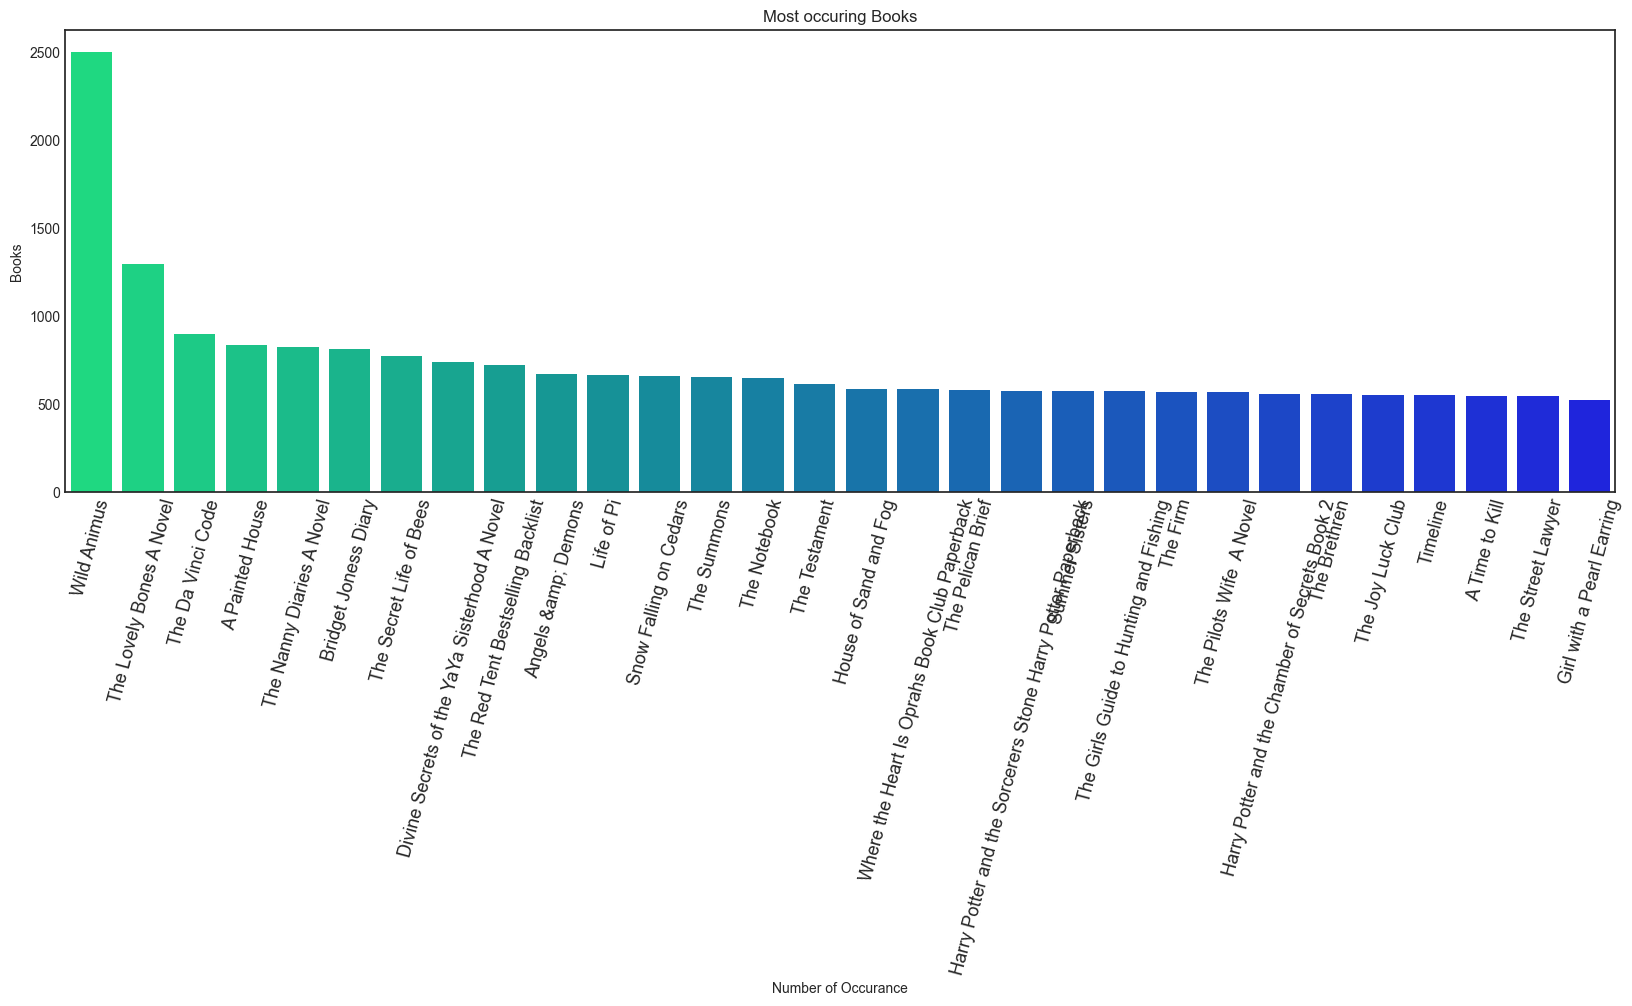

In [27]:
# to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = df['Book-Title'].value_counts()[:30]
sns.barplot(x = book.index, y = book,
           palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to find most occuring book in our data

##### 2. What is/are the insight(s) found from the chart?

Answer Here

many books are occuring many times

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

we should drop few most occuring books so that other books sales boost up

#### Chart - 5

In [28]:
# Chart - 5 visualization code

In [29]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [30]:
publisher = df['Publisher'].value_counts()[:20]
publisher

Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17034
Jove Books                  15178
Silhouette                  14184
Dell                        13916
Scholastic                  13662
Perennial                   13466
Fawcett Books               12905
Dell Publishing Company     12733
HarperTorch                 12081
Vintage Books USA           11426
Simon &amp; Schuster        10318
Name: count, dtype: int64

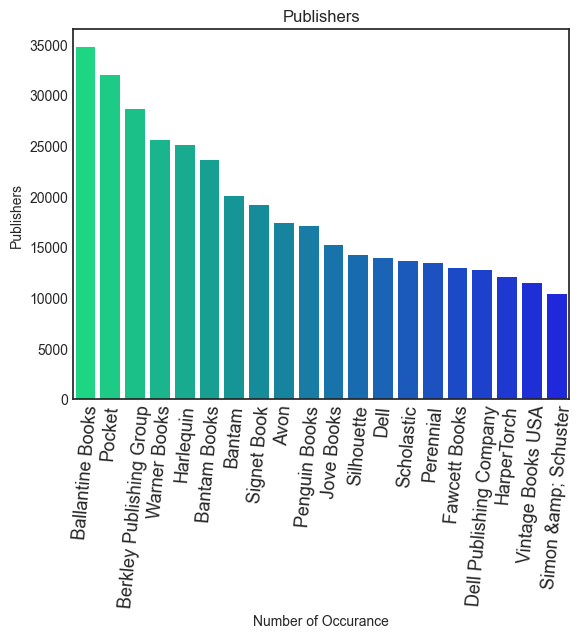

In [31]:
publisher = df['Publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher, palette = 'winter_r')
plt.title("Publishers")
plt.xlabel("Number of Occurance")
plt.ylabel("Publishers")
plt.xticks(rotation = 85, fontsize = 13)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see top Publishers

##### 2. What is/are the insight(s) found from the chart?

Answer Here

ballantine books leads the list following pocket

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

we should mention the Publishers name together with the books when any user clicks on any books if remebers few Publishers name he is likely to read those books

#### Chart - 6

In [32]:
# Chart - 6 visualization code

In [33]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

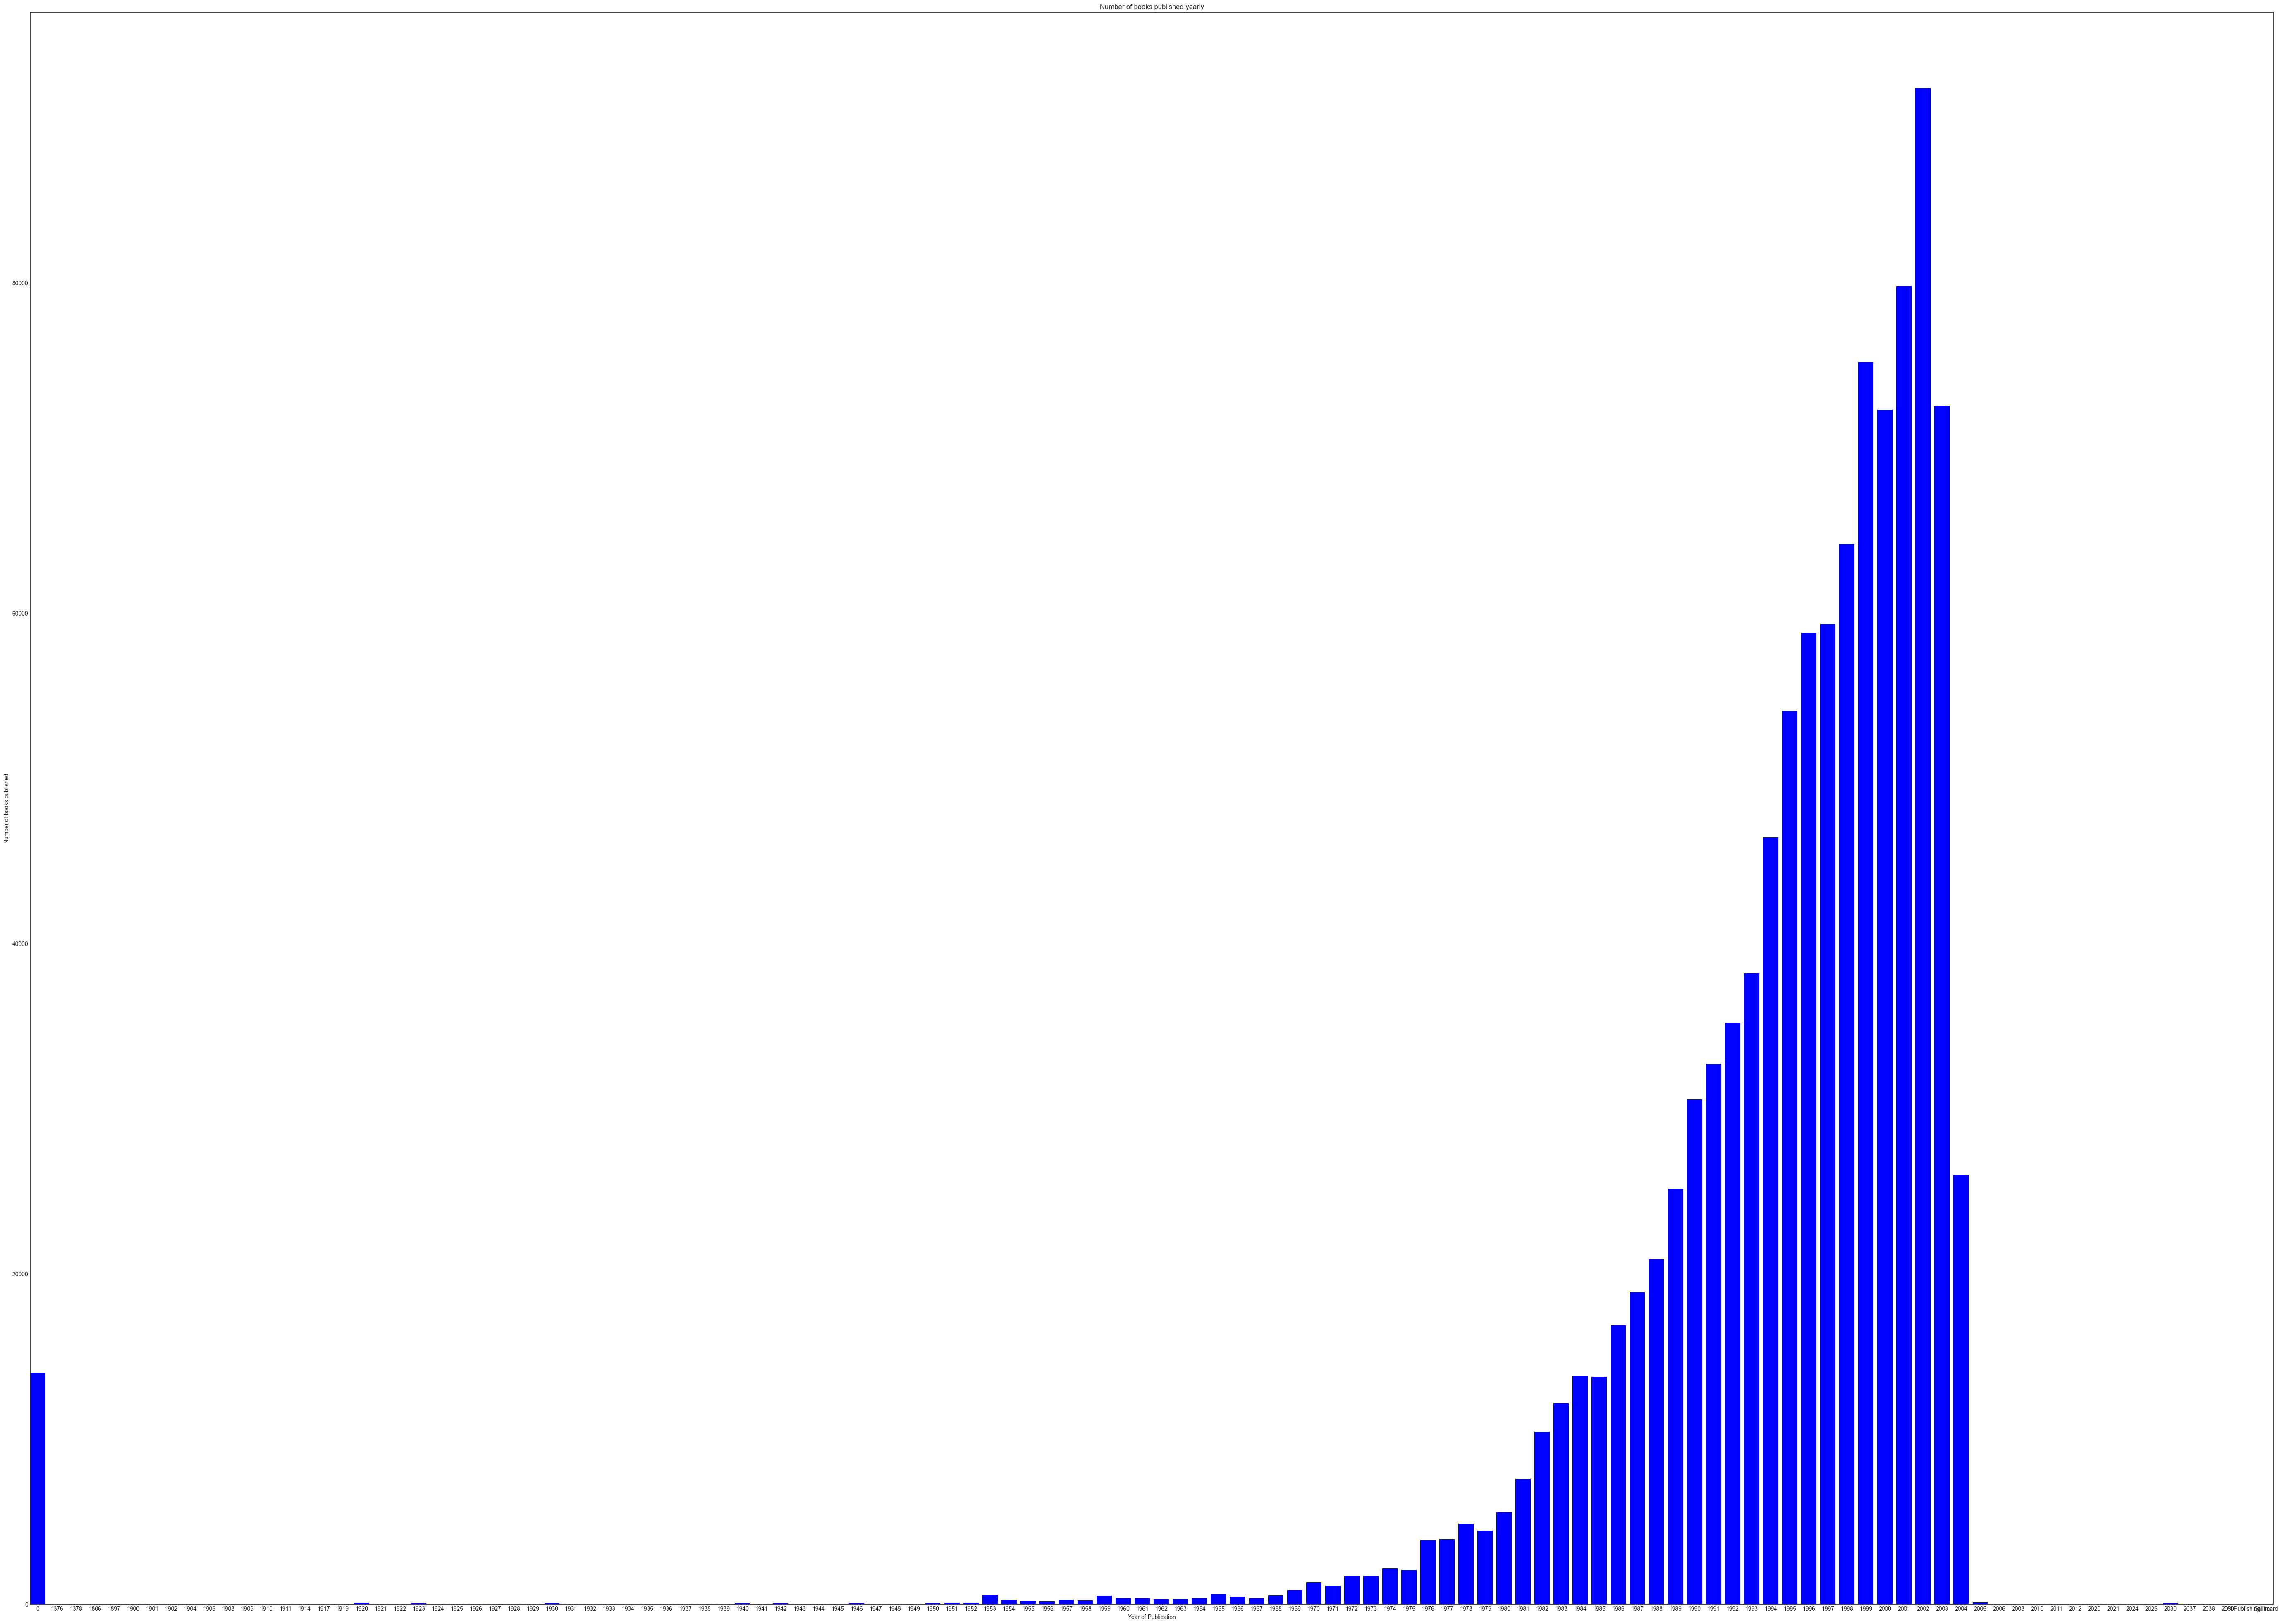

In [34]:
publications = {}
for year in df['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(70, 50))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see distributio of Publication year

##### 2. What is/are the insight(s) found from the chart?

Answer Here

 most books  Publication was done in 2002

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

there was a burst in Publication of books after 1969 till 2002 it was the hightest but after that it suddenly came down should investgate why that caused it 

#### Chart - 7

In [35]:
# Chart - 7 visualization code

In [36]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

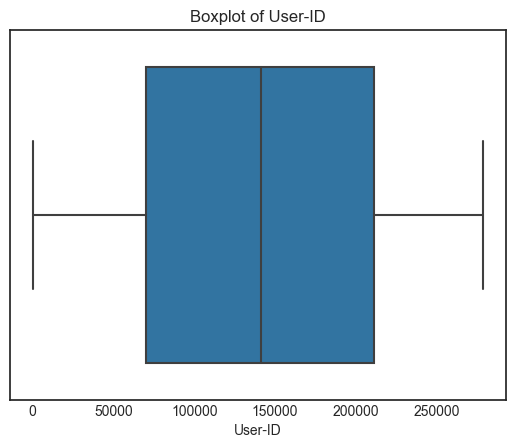

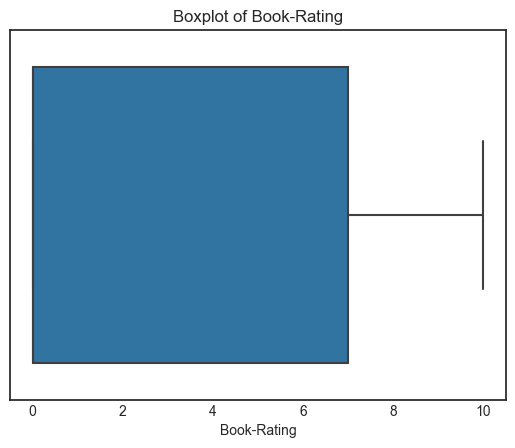

In [37]:

for column in df.describe().columns:
    sns.boxplot(x=column, data=df)
    plt.title("Boxplot of " + column)
    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

to see outliers

##### 2. What is/are the insight(s) found from the chart?

Answer Here

there are no outliers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

as there are no outliers there normal distribution

#### Chart - 8

In [38]:
# Chart - 8 visualization code

In [39]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [40]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook
import ipywidgets
import pandas as pd

# Create a figure
f = figure(height=350, width=600)

# Create a scatter plot
scatter = f.scatter(df['Book-Rating'].values, df['Book-Title'].values)

# Show the figure (assuming you are using Jupyter Notebook)
show(f, notebook_handle=True)


def change_scatter(var1, var2):
    print('Variable on X axis:', var1, '\nVariable on Y axis:', var2)
    scatter.data_source.data['x'] = df[var1].values
    scatter.data_source.data['y'] = df[var2].values
    push_notebook()

# Create dropdown widgets
dd1 = ipywidgets.Dropdown(options=df.columns, value='Book-Rating', description='On x axis:')
dd2 = ipywidgets.Dropdown(options=df.columns, value='Book-Title', description='On y axis:')

# Use interact to update the scatter plot based on dropdown selection
_ = ipywidgets.interact(change_scatter, var1=dd1, var2=dd2)


interactive(children=(Dropdown(description='On x axis:', index=2, options=('User-ID', 'ISBN', 'Book-Rating', '…

##### 1. Why did you pick the specific chart?

Answer Here.

to see scatter plot 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

they are scattered over wide area

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

they are not so closly related leading to negative growth

#### Chart - 9

In [41]:
# Chart - 9 visualization code

In [42]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

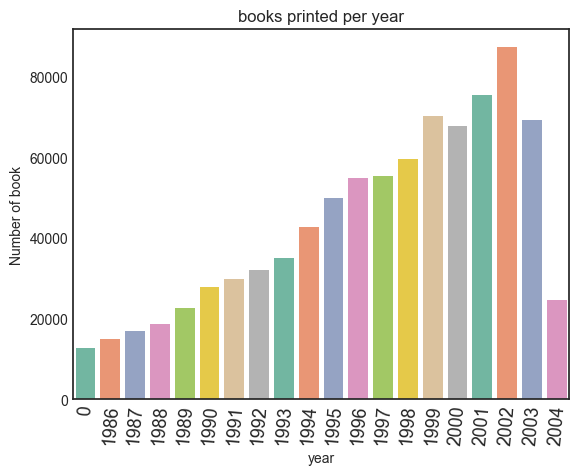

In [43]:
year = df['Year-Of-Publication'].value_counts()[:20]
sns.barplot(x = year.index, y = year, palette = 'Set2')
plt.title("books printed per year")
plt.xlabel("year")
plt.ylabel("Number of book")
plt.xticks(rotation = 85, fontsize = 13)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see how many books were printed each year

##### 2. What is/are the insight(s) found from the chart?

Answer Here

the books printing per  year started increasing after 1980

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

we should see why printing of books gone very low after 2003 leading to negative growth

#### Chart - 10

In [44]:
# Chart - 10 visualization code

In [45]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

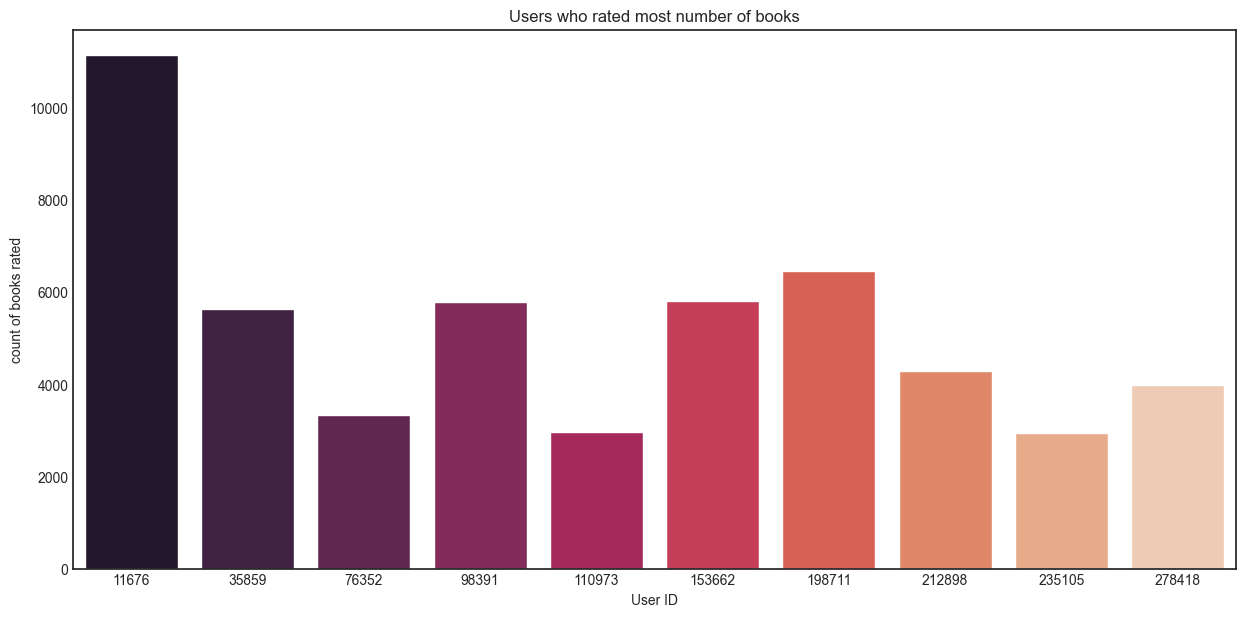

In [46]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = df['User-ID'].value_counts()[0:10].index,y = df['User-ID'].value_counts()[0:10].values,
            palette = 'rocket').set(title="Users who rated most number of books",xlabel = "User ID",ylabel = 'count of books rated')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see who rated the most 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

user 11676 has rated the most 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

this user has read many books and has a nice understanding of books we could take his help to boost our sales by knowing which books are more preferred by public

#### Chart - 11

In [47]:
# Chart - 11 visualization code

In [48]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

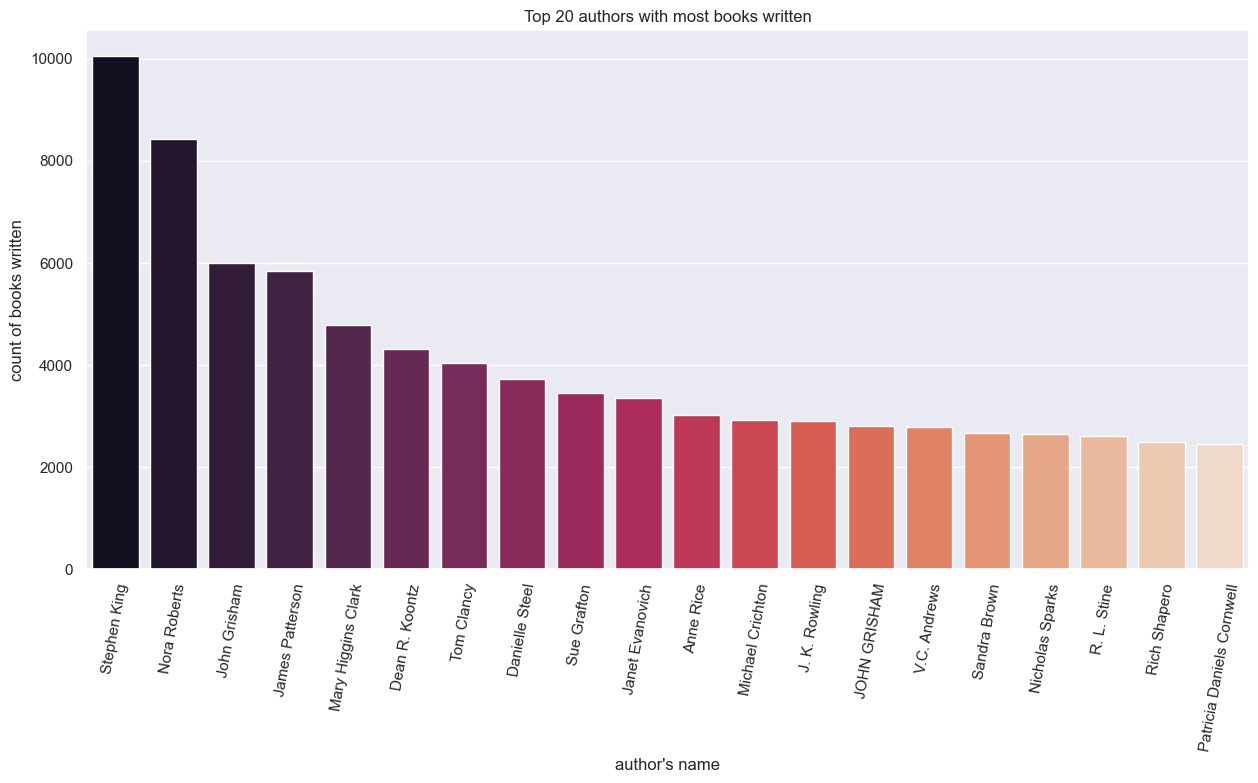

In [49]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = df['Book-Author'].value_counts()[:20].index,y = df['Book-Author'].value_counts()[:20].values,
            palette = 'rocket').set(title = 'Top 20 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see most books written by authors

##### 2. What is/are the insight(s) found from the chart?

Answer Here

stephen king has authored the most books in our dataset with 10000 books. William Shakespeare, nora roberts  are also some of the authors who have written around 8000 books.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

we show case all top books of every authors so that anyone comes to website and can not decide which book to read he can go with by searching with authors name

Answer Here

#### Chart - 12

In [50]:
# Chart - 12 visualization code

In [51]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

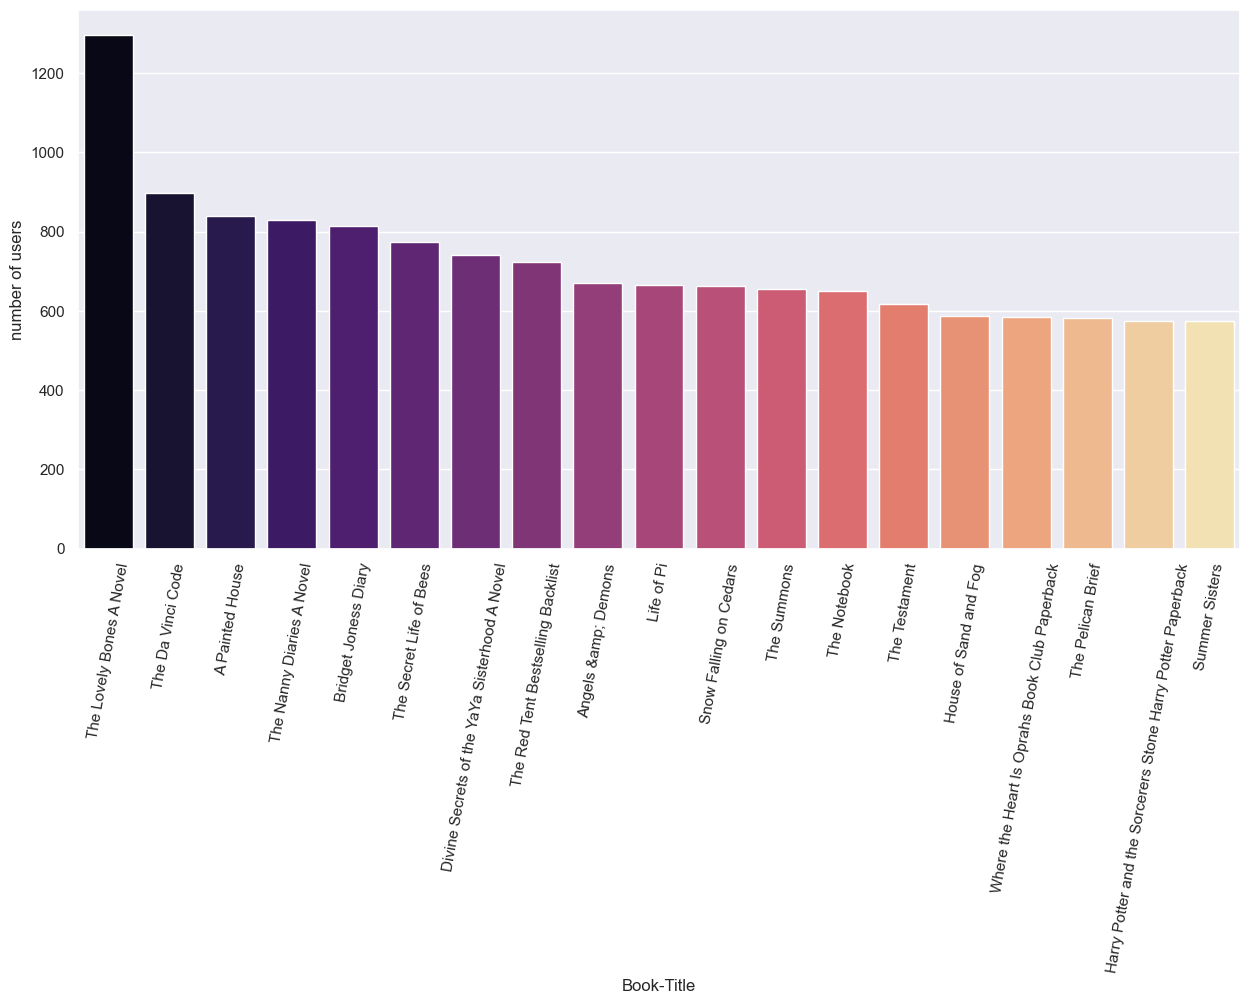

In [52]:

plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = df['Book-Title'].value_counts()[1:20].index,y = df['Book-Title'].value_counts()[1:20].values,
            palette = 'magma').set(xlabel = "Book-Title",ylabel = 'number of users')
plt.xticks(rotation = 80)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

to see which book is rated how much

##### 2. What is/are the insight(s) found from the chart?

Answer Here

the lovely bones a novel is rated the most 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

the books which are rated the most should be recommended to new users so that seeing the rating he is likely to read that book

#### Chart - 13

In [53]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [54]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

cannot  plot correlation map as many string values are there 

ValueError: could not convert string to float: 'Flesh Tones A Novel'

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [55]:
# Pair Plot visualization code

C:\ProgramData\anaconda3\envs\mito\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


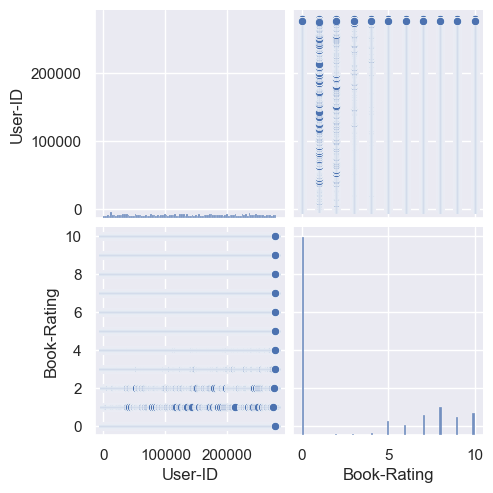

In [56]:
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here



I picked the pairplot because it is a great way to visualize the relationships between multiple variables. It can help you to identify patterns and correlations that would be difficult to see in a table or a list of numbers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is a no strong positive correlation between any columns

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [60]:
# Handling Missing Values & Missing Value Imputation

In [61]:
len(df[df.duplicated()])

0

In [62]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Image-URL-L    4
Book-Author    2
Publisher      2
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Book-Author    0.0
Publisher      0.0
dtype: float64


In [63]:
# Drop missing values in the specified columns
df = df.dropna(subset=["Image-URL-L", "Book-Author", "Publisher"])


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

i filled  the missing values with forward fill

### 2. Handling Outliers

In [64]:
# Handling Outliers & Outlier treatments

In [65]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 8 categorical variables


In [66]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 2 numerical variables


In [67]:
discrete = []
for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Book-Rating  values:  [ 0  5  9  8  6  7  4 10  3  2  1]
There are 1 discrete variables


In [68]:
continuous = [var for var in numerical if var not in discrete and var not in ['Image-URL-S' ,'Image-URL-M'   ,'Image-URL-L' ]]

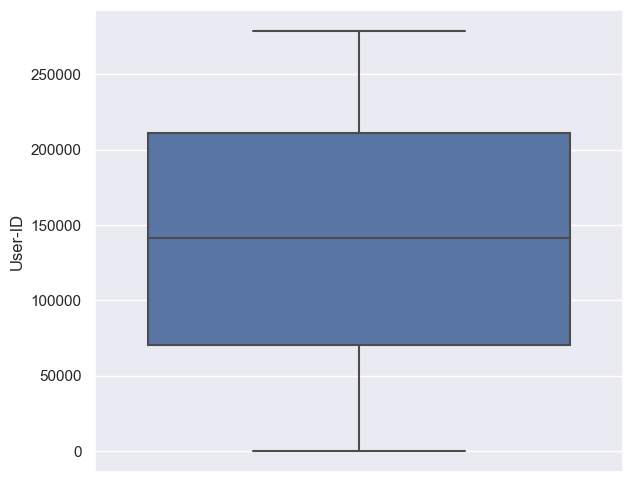

In [69]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

i did not remove outliers because it will remove all rows which are important 
ex in some cases, outliers can be helpful. For example, if you are trying to identify the most popular books, outliers can help you to identify books that are significantly more popular than the rest.

### 3. Categorical Encoding

In [70]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [71]:
# Expand Contraction

#### 2. Lower Casing

In [72]:
# Lower Casing

#### 3. Removing Punctuations

In [73]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [74]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [75]:
# Remove Stopwords

In [76]:
# Remove White spaces

#### 6. Rephrase Text

In [77]:
# Rephrase Text

#### 7. Tokenization

In [78]:
# Tokenization

#### 8. Text Normalization

In [79]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [80]:
# POS Taging

#### 10. Text Vectorization

In [81]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [82]:
# Manipulate Features to minimize feature correlation and create new features

In [83]:


# Convert 'Year-Of-Publication' column to integers
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)

# Convert 'Year-Of-Publication' column back to string (optional)
#df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(str)

print(df.dtypes)

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


C:\Users\yokau\AppData\Local\Temp\ipykernel_26200\3837594973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)


In [122]:

# delete all rows where Book-Rating == 0
df = df[df['Book-Rating'] != 0]
df = df.reset_index(drop = True)
df.shape

(383837, 7)

In [85]:
len(df[df.duplicated()])

0

In [86]:
# to remove alpahet from isbn column

import re

def remove_non_numeric_characters(isbn_column):
  """Removes any non-numeric characters from the ISBN column.

  Args:
    isbn_column: The ISBN column to be cleaned.

  Returns:
    A cleaned ISBN column.
  """

  cleaned_isbn_column = []
  for isbn in isbn_column:
    cleaned_isbn = re.sub(r'[^0-9]', '', isbn)
    cleaned_isbn_column.append(cleaned_isbn)

  return cleaned_isbn_column

def main():
  """Cleans the ISBN column in a dataframe."""

  

  cleaned_isbn_column = remove_non_numeric_characters(df['ISBN'])
  df['ISBN'] = cleaned_isbn_column

  print(df)

if __name__ == '__main__':
  main()


         User-ID        ISBN  Book-Rating  \
1           2313   034545104            5   
3           8680   034545104            5   
4          10314   034545104            9   
9          50403   034545104            9   
13         63970   034545104            8   
...          ...         ...          ...   
1031123   276681  1931333246           10   
1031124   276683  0316185922            5   
1031127   276688  0312264186            8   
1031132   276688  1575660792            7   
1031135   276704  0806917695            5   

                                                Book-Title       Book-Author  \
1                                      Flesh Tones A Novel        M. J. Rose   
3                                      Flesh Tones A Novel        M. J. Rose   
4                                      Flesh Tones A Novel        M. J. Rose   
9                                      Flesh Tones A Novel        M. J. Rose   
13                                     Flesh Tones A Novel 

In [ ]:
df.dtypes

In [88]:
# Convert 'ISBN' column to integers
df['ISBN'] = df['ISBN'].astype('int64')


In [89]:
df.dtypes

User-ID                 int64
ISBN                    int64
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [90]:
import pandas as pd



# Remove the irrelevant features.
df = df.drop([ "Image-URL-S", "Image-URL-M", "Image-URL-L"], axis=1)

# Select the final set of features.
final_features = ["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher","User-ID"]

# Print the final set of features.
print(final_features)


['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'User-ID']


##### What all feature selection methods have you used  and why?

Answer Here.

Step 1: Identify the features that are relevant to the clustering task.

The clustering task is to group books together based on their similarity. The following features are relevant to this task:

ISBN: This is a unique identifier for each book, so it is a good way to identify individual books.
Book-Title: This is the title of the book, which is a good way to describe the content of the book.
Book-Author: This is the author of the book, which is another way to describe the content of the book.
Year-Of-Publication: This is the year the book was published, which can be used to group books together by genre or era.
Publisher: This is the publisher of the book, which can also be used to group books together.
Step 2: Remove features that are not relevant or noisy.

The following features are not relevant to the clustering task:

User-ID: This is the ID of the user who rated the book, and it is not relevant to the clustering task.
Image-URL-S, Image-URL-M, Image-URL-L: These are URLs to images of the book, and they are not relevant to the clustering task.
Step 3: Select the final set of features.



##### Which all features you found important and why?

Answer Here.

The final set of features for the clustering task are:

ISBN
Book-Title
Book-Author
Year-Of-Publication
Publisher

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

In [ ]:
df.dtypes

In [91]:
import pandas as pd
from scipy import stats

# Create a copy of the DataFrame to store the transformed values
df_transformed = df.copy()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Get the column data
    column_data = df[column]
    
    # Check if the column is constant
    if column_data.nunique() > 1:
        # Check if all values in the column are positive
        if column_data.min() > 0:
            # Perform Box-Cox transformation on the column data
            transformed_data, lambda_ = stats.boxcox(column_data)
            
            # Store the transformed values in the new DataFrame
            df_transformed[column] = transformed_data

# Print the transformed DataFrame
#print(df_transformed)


TypeError: '>' not supported between instances of 'str' and 'int'

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [101]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

# Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Enter a book name:  Harry Potter and the Sorcerer's Stone
Enter number of books to recommend:  2


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Popularity Based (Top In whole collection)

In [104]:
def popularity_based(df, n):
    if n >= 1 and n <= len(df):
        data = pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, Books, on='ISBN', left_index = True)
        return result
    return "Invalid number of books entered!!"

In [105]:
print("Top", number, "Popular books are: ")
popularity_based(df, number)

Top 2 Popular books are: 


MergeError: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.

In [107]:
df.dtypes

User-ID                 int64
ISBN                    int64
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
dtype: object

In [110]:
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,2313,34545104,5,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
3,8680,34545104,5,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
4,10314,34545104,9,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
9,50403,34545104,9,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
13,63970,34545104,8,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031123,276681,1931333246,10,Chorus,Kurt Messick,2003,Dry Bones Press
1031124,276683,316185922,5,The River Cafe Wine Primer,Joseph Delissio,2000,"Little, Brown"
1031127,276688,312264186,8,You Cant Catch Death A Daughters Memoir,Ianthe Brautigan,2001,St. Martins Press
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation


In [124]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing 'ISBN', 'Book-Rating', and 'bookName' columns
# Replace 'df' with the actual name of your DataFrame.

bookName = input("Enter a book name: ")
number = int(input("Enter the number of books to recommend: "))


#dataframe=df.copy()
def popularity_based(df, n):
    if n >= 1 and n <= len(df):
        # Group by 'ISBN' and count the occurrences of each 'Book-Rating'
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count())

        # Sort the data in descending order based on the count of 'Book-Rating'
        data = data.sort_values('Book-Rating', ascending=False).head(n)

        # Merge the popular books data with the original df to get additional information like 'bookName'
        result = pd.merge(data, df, on='ISBN')

        # Drop duplicates based on 'ISBN' to avoid recommending the same book multiple times
        result = result.drop_duplicates(subset=['ISBN'])

        # Drop unnecessary columns and keep only 'bookName' and 'Book-Rating'
        result = result[['Book-Title', 'Book-Rating']]

        return result
    return "Invalid number of books entered!!"

# Call the function to get recommendations
print("Top", number, "Popular books are:")
recommended_books = popularity_based(df, number)
print(recommended_books)


Enter a book name:  Flesh Tones A Novel
Enter the number of books to recommend:  3


Top 3 Popular books are:


KeyError: "['Book-Rating'] not in index"

In [119]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing 'ISBN', 'Rating', and 'bookName' columns
# Replace 'df' with the actual name of your DataFrame.

bookName = input("Enter a book name: ")
number = int(input("Enter the number of books to recommend: "))

dataframe=df.copy()


def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        # Group by 'ISBN' and count the occurrences of each book rating
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count())

        # Sort the data in descending order based on the count of book ratings
        data = data.sort_values('Book-Rating', ascending=False).head(n)

        # Merge the popular books data with the original DataFrame to get additional information like 'bookName'
        result = pd.merge(data, dataframe, on='ISBN')

        # Drop duplicates based on 'ISBN' to avoid recommending the same book multiple times
        result = result.drop_duplicates(subset=['ISBN'])

        # Drop unnecessary columns and keep only 'bookName' and 'Rating'
        result = result[['Book-Title', 'Book-Rating']]

        return result
    return "Invalid number of books entered!!"

# Call the function to get recommendations
print("Top", number, "Popular books are:")
recommended_books = popularity_based(df, number)
print(recommended_books)


Enter a book name:  Flesh Tones A Novel
Enter the number of books to recommend:  2


Top 2 Popular books are:


KeyError: "['Book-Rating'] not in index"

In [115]:
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,2313,34545104,5,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
3,8680,34545104,5,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
4,10314,34545104,9,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
9,50403,34545104,9,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
13,63970,34545104,8,Flesh Tones A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031123,276681,1931333246,10,Chorus,Kurt Messick,2003,Dry Bones Press
1031124,276683,316185922,5,The River Cafe Wine Primer,Joseph Delissio,2000,"Little, Brown"
1031127,276688,312264186,8,You Cant Catch Death A Daughters Memoir,Ianthe Brautigan,2001,St. Martins Press
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***